In [2]:
#Kaggle link :https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
#https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/kernels

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [5]:
dataset = pd.read_csv('winequality.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

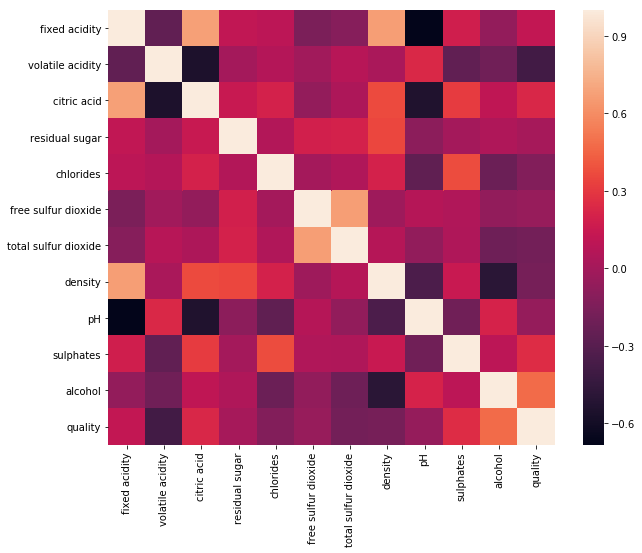

In [14]:
corr = dataset.corr()
sns.heatmap(corr)

In [17]:
corr['quality'].sort_values(asciiending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [127]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1:]

In [128]:
#Splitting into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

# Without PCA

In [129]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

scores = []
estimators = np.arange(10, 100, 10)

for n in estimators:
    classifier = RandomForestClassifier(n_estimators=n)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

print(scores)

c:\users\saurav\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
c:\users\saurav\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
c:\users\saurav\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
c:\users\saurav\appdata\local\programs\python\python37-32\lib\site-

[0.65, 0.709375, 0.70625, 0.71875, 0.71875, 0.725, 0.703125, 0.7125, 0.7125]


# Applying PCA

In [130]:
#Feature Scaling before PCA is required
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()
X_train_norm = sscaler.fit_transform(X_train)
X_test_norm = sscaler.transform(X_test)

In [143]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_norm)
X_test_pca = pca.transform(X_test_norm)

In [144]:
pca.explained_variance_ratio_

array([0.28114322, 0.17257377, 0.14136683, 0.11078695, 0.08874523,
       0.05974374, 0.05340152])

In [146]:
#RandomForestClassifier

scores =[]
estimators = np.arange(10, 100, 10)

for n in estimators:
    classifier = RandomForestClassifier(n_estimators=n)
    classifier.fit(X_train_pca, y_train)
    y_pred = classifier.predict(X_test_pca)
    scores.append(accuracy_score(y_test, y_pred))

print(scores)
print('The best accuracy ({}) is obtained when n_estimators = {}'.format(max(scores), estimators[scores.index(max(scores))]))

c:\users\saurav\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
c:\users\saurav\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
c:\users\saurav\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
c:\users\saurav\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

[0.665625, 0.690625, 0.69375, 0.690625, 0.69375, 0.70625, 0.709375, 0.696875, 0.696875]
The best accuracy (0.709375) is obtained when n_estimators = 70


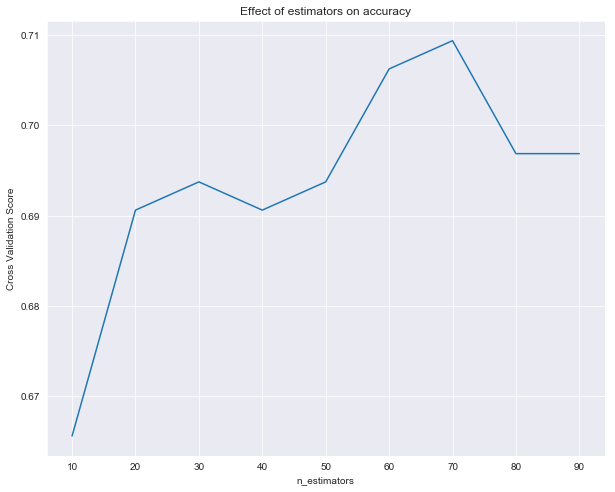

In [147]:
sns.set_style("darkgrid")
plt.xlabel('n_estimators')
plt.ylabel("Cross Validation Score")
plt.title("Effect of estimators on accuracy")
plt.plot(estimators, scores)

In [150]:
#Cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train_pca, y_train, cv=5)

print(scores.mean())

c:\users\saurav\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\saurav\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\saurav\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\saurav\appdata\local\p

0.6451350993000776
